In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# 데이터 시각화(추세 등)패키지.
import seaborn as sns
# 통계 분석 패키지
from scipy import stats
import scipy.stats
# 쥬피터로 그래프 그리기 위한 장치
%matplotlib inline
# 한글폰트 적용
matplotlib.rc('font', family = 'Malgun Gothic')
plt.rc('font', family = 'Malgun Gothic')

## [연습] 기술통계 분석

In [4]:
ds_mycars = pd.read_csv("C:/Users/ParkChihyun/Desktop/2주차 교육자료/mycars.csv", engine = "python")
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [5]:
# 연속형 변수만 가져와서 통계량 준다. # 범주형은 mean이나 std에서 안나눠지니깐 빠짐.!!
ds_mycars.describe().round(3)
# 25% 지점은 q1
# 50% 지점은 q2이며 중앙값

,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


In [6]:
# 자동차 모델과 mpg데이터 subset
df = ds_mycars[['model','mpg']]
# 모델별 데이터 수 평균 표준편차
df.groupby('model').describe()
# 모델칼럼을 새로운 index로 하여 통계량 준다.

# 가장 연비(mean) 나쁜건 캐딜락
# 가장 연비 좋은건 도요타 코롤라

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

## [실습] 기술통계

In [8]:
ds_mycars = pd.read_csv("C:/Users/ParkChihyun/Desktop/2주차 교육자료/mycars.csv", engine = "python")
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [9]:
# 구동방식별 시내에서 연비 통계치
df = ds_mycars[['driving','mpg']]
df.groupby('driving').describe()

mpg                                                   
         count       mean       std   min   25%   50%   75%   max
driving                                                          
4        103.0  14.330097  2.874459   9.0  13.0  14.0  16.0  21.0
f        106.0  19.971698  3.626510  11.0  18.0  19.0  21.0  35.0
r         25.0  14.080000  2.215852  11.0  12.0  15.0  15.0  18.0

In [10]:
# 구동방식별 고속도로에서 연비 통계치
df = ds_mycars[['driving','highway_mileage']]
df.groupby('driving').describe()

highway_mileage                                                   
                  count       mean       std   min   25%   50%   75%   max
driving                                                                   
4                 103.0  19.174757  4.078704  12.0  17.0  18.0  22.0  28.0
f                 106.0  28.160377  4.206881  17.0  26.0  28.0  29.0  44.0
r                  25.0  21.000000  3.662877  15.0  17.0  21.0  24.0  26.0

## [실습] 기술통계(이산형 data 표현)

In [11]:
ds_mycars = pd.read_csv("C:/Users/ParkChihyun/Desktop/2주차 교육자료/mycars.csv", engine = "python")
# 모델과 mpg 칼럼만 뽑기
df = ds_mycars[['model','mpg']]

# 처음 data의 model 칼럼에 있는 순서를 그대로 유지함 ^^
count = df['model'].value_counts().sort_index()

# cumulative counts 구하기, 앞에서 정렬한 각 카운트를 하나씩 cumulative해서 원소 생성
cumcnt = np.cumsum(count)

# 전체 자동차에서 특정 모델의 비율
percent = count / sum(count)*100

# cumulative percent 누적확률
cumpct = np.cumsum(percent)

# 판다스 불러서 mXn 구조(=dataframe)로 저장
count_data = pd.DataFrame({'Count': count, 'CumCnt':cumcnt, 'Percent':percent,'Cumpct':cumpct})

# 칼럼의 좌측상단의 이름을 model이 위치하도록
count_data.columns.name='model'

# 결과 확인

count_data

model,Count,CumCnt,Percent,Cumpct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513
c1500 suburban 2wd,5,35,2.136752,14.957265
camry,7,42,2.991453,17.948718
camry solara,7,49,2.991453,20.940171
caravan 2wd,11,60,4.700855,25.641026
civic,9,69,3.846154,29.487179


## [실습] 정규분포의 확률계산(1) : 키

In [12]:
mu = 175
sigma = 5
x = 180
prob = stats.norm.cdf(x, mu, sigma)   # x는 누적확률을 찾는 기준 X가 됨.
print("나의 키가 {0}cm 일 경우에 나는 {1}% 범위에 위치한다.".format(x,(1-prob)*100))    # 상위 %를 구하기 위해 1-prob 로 코딩

나의 키가 180cm 일 경우에 나는 15.865525393145708% 범위에 위치한다.


## [실습] 정규분포의 확률계산(2) : 자동차

In [6]:
# (1)번
mu = 12
sigma = 3
x = 9
prob = stats.norm.cdf(x, mu, sigma)
print("1리터를 가지고 9km 이상 15km 이하를 달릴 확률은 {:.1f}%".format((0.5-prob)*2*100))

1리터를 가지고 9km 이상 15km 이하를 달릴 확률은 68.3%


In [7]:
# (2)번
mu = 12
sigma = 3
x = 15
prob = stats.norm.cdf(x, mu, sigma)
print("1리터를 가지고 15km 이상을 달릴 확률은 {:.1f}%".format((1-prob)*100))

1리터를 가지고 15km 이상을 달릴 확률은 15.9%


## [실습] t분포(자유도와 t값을 이용!)

In [13]:
t = 2.0
df = 100
prob = stats.t.cdf(t, df)
print("t값이 {}일 때, P(T<=t)는 {:.1f}".format(t, prob))

t값이 2.0일 때, P(T<=t)는 1.0


## [실습] 카이제곱분포(1)(자유도와 data개수로 그래프그리기)

C:\Users\ParkChihyun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ParkChihyun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

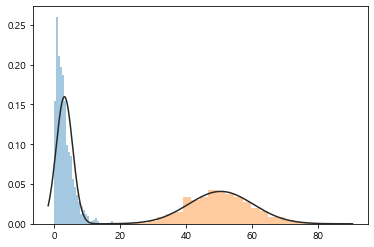

In [14]:
# seed선택을 하여 매번 실행 시 동일한 값이 나오게 한다.
np.random.seed(seed = 1234)

# 주어진 데이터 수와 자유도를 반영하는 카이제곱분포 데이터를 생성한다.
# 여기서 자유도는 한 표본내의 데이터 수(표본의 크기)이고, n은 표본의 개수이다. 
chisq_df3 = np.random.chisquare(df=3, size=1000)
# 히스토그램에 정규분포 선을 그리고 kde는 생성하지 않게 설정한다.
# kde는 그래프 성형을 너무 많이 시켜서 필요 없었다.
sns.distplot(chisq_df3, fit = stats.norm, kde = False)

# 자유도를 50으로 바꾼 카이제곱 그래프도 설정한다.
chisq_df50 = np.random.chisquare(df=50, size=1000)
sns.distplot(chisq_df50, fit = stats.norm, kde = False)

## [실습] 카이제곱분포(2)(자유도와 kaisquare값으로 누적확률구하기)

In [15]:
chisq = 3
df = 8
# 누적확률 계산한다.
prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}) : {1:.3f}".format(chisq, prob))

P(X<=3) : 0.066


## [실습] F-분포

In [16]:
# F값!
f = 1.5

# F분포에 사용된 두 개의 그룹 각각의 자유도를 저장한다.
dfnum = 10 
dfden = 100
# 누적확률 값 계산한다.
prob = stats.f.cdf(x=f, dfn =dfnum, dfd = dfden)
print("P(X<=F) : {:.3f}".format(prob))

P(X<=F) : 0.850


## [실습] Weibull 분포

In [17]:
x = 2500
alpha = 5.2 # 형상(형태)모수
beta = 2200 # 척도 모수
prob = stats.weibull_min.cdf(x,alpha, scale = beta)
print("P(X>=2500):{:.3f}".format(1-prob))

P(X>=2500):0.143


## [실습] 이항분포

In [10]:
# 각각의 확률 구하기!!
# n은 임의로 선택한 것의 개수
# k는 n중에 몇 개인지를 나타내고
# p는 정해진 확률값
n=5
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.3)
    print("P(X={})={:.3f}".format(i,prob))

P(X=0)=0.168
P(X=1)=0.360
P(X=2)=0.309
P(X=3)=0.132
P(X=4)=0.028
P(X=5)=0.002


In [18]:
# 2대 이하 확률 같은 누적확률 구하기!!
n=5
prob = stats.binom.cdf(2, n=n, p=0.3)
print("P(X<={})={:.3f}".format(2,prob))

P(X<=2)=0.837


## [실습] 포아송분포

In [19]:
mu = 3    # 문제 조건에 있는 평균 , 기대값
# mu옆 자리의 숫자는 구하고자하는 목표치
# (1)
prob = stats.poisson.pmf(2,mu)
print("2명의 손님이 도착할 확률:{:.2f}".format(prob*100))
# (2)
cdf_prob_x_1 = stats.poisson.cdf(1,mu)
print("1명 이하의 손님이 도착할 확률:{:.2f}".format(cdf_prob_x_1*100))
# (3)
cdf_prob_x_2 = stats.poisson.cdf(2,mu)
print("3명 이상의 손님이 도착할 확률:{:.2f}".format((1-cdf_prob_x_2)*100))

2명의 손님이 도착할 확률:22.40
1명 이하의 손님이 도착할 확률:19.91
3명 이상의 손님이 도착할 확률:57.68


## [실습] 정규성 검정 
### 조건 : 신뢰수준은 95%로 설정한다.

In [ ]:
# 정규성 검정
# (1) 통계량에 의한 검정
# 샤피로(data적을때), anderson-darling(data많을때)
# (2) 그래프에 의한 검정
# 히스토그램, kernel density plot, qq plot

In [20]:
# 데이터 시각화(추세 등)패키지.
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# 가설검정 및 통계 분석 패키지
from scipy import stats
# 선형모델 formula(y~x1+x2+...)
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# 쥬피터로 그래프 그리기 위한 장치
%matplotlib inline

In [21]:
# 한글폰트 적용
matplotlib.rc('font', family = 'Malgun Gothic')
plt.rc('font', family = 'Malgun Gothic')
# seaborn에서 한글깨짐 해결 : unicode minus 사용하지 않기 위한 설정
# (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

In [22]:
# 파일 불러온다!
from scipy.stats import shapiro
ds_mat = pd.read_csv("C:/Users/ParkChihyun/Desktop/2주차 교육자료/2sample_t_test.csv", engine = "python")

ds_mat
# Mat_A 와 Mat_B 컬럼의 길이가 달라서 길이 확인해본다. 
# 컬럼 길이 각각 확인하고 거기에 맞춰서 slice로 데려온다. 

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1
5,71.5,72.7,71.5,1
6,74.5,66.9,74.5,1
7,77.5,70.2,77.5,1
8,76.4,74.4,76.4,1
9,77.7,70.1,77.7,1


In [23]:
# Mat_A 정규성 검정: 샤피로 윌크 테스트
statistic, p = stats.shapiro(ds_mat['Mat_A'])
print("statistic={}, p-value={}".format(statistic, p))

# nan 나온 이유!
# 컬럼 길이 각각 확인해봤더니 Mat_A 와 Mat_B 컬럼의 길이가 Total 과 Sub 컬럼과 달라서 NaN이 입력된 것이다.
# NaN을 제외한 컬럼의 길이만큼만 slice로 데려온다. 

statistic=nan, p-value=1.0


In [24]:
# Mat_A 정규성 검정(컬럼 길이 재설정): 샤피로 윌크 테스트
statistic, p = stats.shapiro(ds_mat['Mat_A'][0:10])
print("statistic={}, p-value={}".format(statistic, p))

# nan 나온 이유!
# 컬럼 길이 각각 확인해봤더니 Mat_A 와 Mat_B 컬럼의 길이가 Total 과 Sub 컬럼과 달라서 NaN이 입력된 것이다.
# NaN을 제외한 컬럼의 길이만큼만 slice로 데려온다. 

# 결론 
# P-value가 0.256으로 유의수준인 0.05보다 크다.
# 이러한 이유로 정규성이 있다고 결론을 내릴 수 있다.

statistic=0.9062638878822327, p-value=0.25630074739456177


In [25]:
# Mat_B 정규성 검정(컬럼 길이 재설정): 샤피로 윌크 테스트
statistic, p = stats.shapiro(ds_mat['Mat_B'][0:10])
print("statistic={}, p-value={}".format(statistic, p))

# 결론 
# P-value가 0.916으로 유의수준인 0.05보다 크다.
# 이러한 이유로 정규성이 있다고 결론을 내릴 수 있다.

statistic=0.9729756116867065, p-value=0.9169799089431763


## [실습] 모평균 추정(모표준편차 아는 경우)

In [28]:
# 평균구하는 법
a = [18,20]
np.mean(a)

19.0

In [44]:
# 데이터 직접입력
df = pd.DataFrame({'weight':[18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})
df.head()
# 모평균의 신뢰구간 추정 (loc : 평균의 값, scale: 변동 정도=표준오차(sigma/sqrt(n)))
# 정규분포 구간 추정 함수 실행
lower, upper = stats.norm.interval(0.95, loc=np.mean(df), scale=3.8/np.sqrt(20))
print("신뢰구간: ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간: ([17.83],[21.17])


## [실습] 모평균 추정(모표준편차 모르는 경우)

In [69]:
# 데이터 직접입력
df = pd.DataFrame({'strength':[73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,70,75,72]})
df.head()
# 모평균의 신뢰구간 추정 (loc : 평균의 값, scale: 변동 정도)
# 정규분포 구간 추정 함수 실행 #loc은 표본평균 #자유도 대입 # scale은 SEM(standard error mean)표준오차를 뜻한다.
lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = stats.sem(df))
print("신뢰구간: ({0},{1})".format(lower.round(2), upper.round(2)))

신뢰구간: ([70.6],[72.4])


## [실습] 모분산 신뢰구간 추정

In [31]:
n = 50
s = 3.984

# 카이제곱 분포표로 확인
kaisquare_alpha = 71
kaisquare_alpha2 = 32

sigma1 = (n-1)*(np.square(s))/kaisquare_alpha
sigma2 = (n-1)*(np.square(s))/kaisquare_alpha2

print("모분산의 95% 신뢰구간 = ({:.3f},{:.3f})".format(sigma1, sigma2))

모분산의 95% 신뢰구간 = (10.954,24.304)


## [실습] 모비율 신뢰구간 추정

In [60]:
# 데이터 중 15초과한 비율
p_hat = 0.18
n = 50
Z = 1.96
p_1 = p_hat-Z*np.sqrt((p_hat*(1-p_hat)/n))
p_2 = p_hat+Z*np.sqrt((p_hat*(1-p_hat)/n))
print("통화관리 성공율에 대한 95% 신뢰구간 = ({:.3f},{:.3f})".format(p_1, p_2))

통화관리 성공율에 대한 95% 신뢰구간 = (0.074,0.286)


# 예상문제

In [34]:
# 표 하나 주고 이를 한개의 시리즈로 구성된 dataframe으로 만들고
# 정규성 검정, 평균과 표준편차 구한다.
# 30 이하일 확률 같은 걸 계산한다.
df = pd.DataFrame({'weight':[18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})
df.head()

,weight
0,18
1,18
2,20
3,21
4,20


In [36]:
statistic, p = stats.shapiro(df['weight'])
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.955651044845581, p-value=0.46101993322372437


In [39]:
df['weight'].mean()
df['weight'].std()

1.6059101370939324

In [41]:
mu = 34
sigma = 5
x = 30
prob = stats.norm.cdf(x, mu, sigma)
print("나의 키가 {0}cm 일 경우에 나는 {1}% 범위에 위치한다.".format(x,(1-prob)*100)) 

나의 키가 30cm 일 경우에 나는 78.81446014166033% 범위에 위치한다.
